In [11]:
import math
import time
from datetime import datetime
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import point, Polygon, shape
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from pathlib import Path
import folium
from folium import plugins
from IPython.display import display
from folium.plugins import MarkerCluster
import pyproj

file_path ='/Users/gholvea/Source/Berlin/BerlinLoopLocation.csv'
berlinData = pd.read_csv(file_path, sep =",")
pd.set_option('colheader_justify', 'center')

berlinLoopData = berlinData[['ZE_ID15','MQ_ID15','DET_ID15','LANE','ANZAHL_DET', 'MQ_SHORT_NAME', 'POSITION_x', 'IBS_DATUM', 'X_GK4_y', 'Y_GK4_y', 'POSITION_y', 'POSITION_DETAIL', 'DIRECTION', 'ORIENTATION']]
berlinLoop = berlinLoopData.drop(['POSITION_x', 'IBS_DATUM', 'POSITION_y', 'POSITION_DETAIL', 'DIRECTION'], axis=1)
berlinLoop


,ZE_ID15,MQ_ID15,DET_ID15,LANE,ANZAHL_DET,MQ_SHORT_NAME,X_GK4_y,Y_GK4_y,ORIENTATION
0,100401010000103,100201010000077,100101010000167,HF_R,2,TE001,4.581212e+06,5.811849e+06,Südwest
1,100401010000103,100201010000077,100101010000268,HF_2vR,2,TE001,4.581212e+06,5.811849e+06,Südwest
2,100401010000103,100201010000178,100101010000369,HF_R,2,TE002,4.581223e+06,5.811843e+06,Nordost
3,100401010000103,100201010000178,100101010000470,HF_2vR,2,TE002,4.581223e+06,5.811843e+06,Nordost
4,100401010000204,100201010032615,100101010069885,HF_R,2,TE080,4.592651e+06,5.809409e+06,Süd
...,...,...,...,...,...,...,...,...,...
1560,100401190046045,100201190050265,100101190090064,HF_2vR,2,TE544BER,4.603518e+06,5.804933e+06,West
1561,100401190046146,100201190050366,100101190090165,HF_R,2,TE542BER,4.603462e+06,5.804459e+06,Ost
1562,100401190046146,100201190050366,100101190090266,HF_2vR,2,TE542BER,4.603462e+06,5.804459e+06,Ost
1563,100401190046146,100201190050467,100101190090367,HF_R,2,TE543BER,4.603458e+06,5.804466e+06,Ost


# Converting the XY coordinates to Latitude and Longitude


In [3]:
transformer = pyproj.Transformer.from_crs("epsg:5684", "epsg:4326")
transformer.transform(-11705274.6374, 4826473.6922)

(5.758913765315918, -71.03630049021884)

In [4]:
def transform(detector):
    x,y = transformer.transform(detector.X_GK4_y, detector.Y_GK4_y)
    return pd.Series({
        "latitude": x,
         "longitude": y
    })

dfdet = berlinLoop.apply(transform, axis =1)

In [5]:
df1 = berlinLoop.join(dfdet)
berlinNLoop = df1.drop(columns= ['X_GK4_y','Y_GK4_y'])

# Get points geometry of existing loops on map

In [6]:
berLoopNew = gpd.GeoDataFrame(berlinNLoop, geometry = gpd.points_from_xy(berlinNLoop.longitude, berlinNLoop.latitude))
berLoopNew.head()

,ZE_ID15,MQ_ID15,DET_ID15,LANE,ANZAHL_DET,MQ_SHORT_NAME,ORIENTATION,latitude,longitude,geometry
0,100401010000103,100201010000077,100101010000167,HF_R,2,TE001,Südwest,52.433874,13.192581,POINT (13.19258 52.43387)
1,100401010000103,100201010000077,100101010000268,HF_2vR,2,TE001,Südwest,52.433874,13.192581,POINT (13.19258 52.43387)
2,100401010000103,100201010000178,100101010000369,HF_R,2,TE002,Nordost,52.433818,13.192749,POINT (13.19275 52.43382)
3,100401010000103,100201010000178,100101010000470,HF_2vR,2,TE002,Nordost,52.433818,13.192749,POINT (13.19275 52.43382)
4,100401010000204,100201010032615,100101010069885,HF_R,2,TE080,Süd,52.410132,13.360058,POINT (13.36006 52.41013)


<AxesSubplot:>

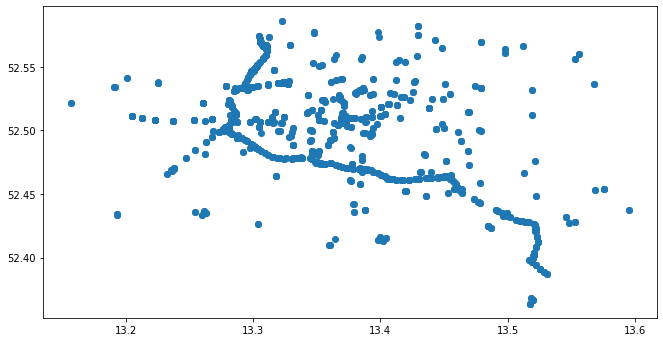

In [7]:
berLoopNew['geometry'].plot(figsize=(11,7))  

# Available Loop Configuration
list of available loops and location on the map of Berlin city.

In [8]:
map = folium.Map(location=[13.3603, 52.5373], zoom_start=14)

for index, row in berLoopNew.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    locationId = row['DET_ID15']
    pointLabel = row['MQ_SHORT_NAME']
  
    folium.Marker(location = [latitude, longitude], 
                  popup = berLoopNew.iloc[index]['MQ_SHORT_NAME']
                 ).add_to(map)
    
map

# Berlin Loop data for Year 2019
source: https://tomtominternational.sharepoint.com/sites/TrafficExpertsTeamsEECAWCE/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FTrafficExpertsTeamsEECAWCE%2FShared%20Documents%2FLoop%20Data%20RSO%2FLoop%20Data%20Berlin%2Ezip&parent=%2Fsites%2FTrafficExpertsTeamsEECAWCE%2FShared%20Documents%2FLoop%20Data%20RSO

In [254]:
pathToData = "/Users/gholvea/Source/Berlin/Loop Data Berlin/det_val_hr_2019.csv.gz"
berlinLD19 = pd.read_csv(pathToData, sep =";")

berlinLoop19 = berlinLD19.rename(columns={ 'q_pkw_det_hr':'carcount_hr', 'q_lkw_det_hr':'truckcount_hr', 'q_kfz_det_hr': 'toatlcountvehicle_hr', 'v_pkw_det_hr':'speedbycar', 'v_lkw_det_hr':'speedbytruck','v_kfz_det_hr':'avgspeedbyvehicle' })
berlinLoop19.drop(columns= ['speedbycar', 'speedbytruck', 'avgspeedbyvehicle'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [255]:
df =berlinLoop19.dropna(subset=['carcount_hr', 'truckcount_hr','toatlcountvehicle_hr'])
df = df.dropna()
df19 = df.reset_index(drop=True)

In [256]:
berlinDet1 = berLoopNew.merge(df19, how='inner', left_on='DET_ID15', right_on='detid_15')
berDetector1 = berlinDet1.drop(columns= ['detid_15'])
#berDetector.sort_values(by=['DET_ID15', 'tag'])
berlinLoop19 = berDetector1[[ 'ZE_ID15','MQ_ID15','DET_ID15','tag', 'stunde', 'LANE', 'MQ_SHORT_NAME','ORIENTATION', 'ANZAHL_DET', 'latitude', 'longitude', 'carcount_hr', 'truckcount_hr','toatlcountvehicle_hr']]
berlinLoop19.sort_values(by=['tag'])

,ZE_ID15,MQ_ID15,DET_ID15,tag,stunde,LANE,MQ_SHORT_NAME,ORIENTATION,ANZAHL_DET,latitude,longitude,carcount_hr,truckcount_hr,toatlcountvehicle_hr
8774471,100401020038286,100201020038264,100101020115853,01.01.2019,5.0,ZuL_R,M27911,Nord,2,52.511721,13.371003,16.0,0.0,16.0
7061476,100401020009792,100201020009770,100101020023806,01.01.2019,16.0,NaN,MQ439,Nord,2,52.462670,13.405069,46.0,0.0,46.0
7061477,100401020009792,100201020009770,100101020023806,01.01.2019,22.0,NaN,MQ439,Nord,2,52.462670,13.405069,15.0,1.0,16.0
7061483,100401020009792,100201020009770,100101020023806,01.01.2019,11.0,NaN,MQ439,Nord,2,52.462670,13.405069,14.0,0.0,14.0
11090011,100401020183483,100201020183461,100101020152027,01.01.2019,21.0,NaN,MQ65930,Süd,3,52.416435,13.523035,170.0,0.0,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1280184,100401010009193,100201010011696,100101010023106,31.12.2019,1.0,HF_3vR,TE140,West,2,52.498265,13.388182,117.0,2.0,119.0
4859331,100401010048805,100201010053934,100101010095349,31.12.2019,7.0,HF_2vR,TE569,Nordost,2,52.480821,13.347270,45.0,3.0,48.0
4310973,100401010042741,100201010045345,100101010082013,31.12.2019,9.0,HF,TE493,Nordwest,2,52.525892,13.418839,59.0,3.0,62.0
1381729,100401010009500,100201010012104,100101010024318,31.12.2019,12.0,HF_2vR,TE223,Süd,3,52.508236,13.351626,278.0,1.0,279.0


In [257]:
berlinLoop19['datetime']= pd.to_datetime(berlinLoop19['tag'] +' ' + berlinLoop19['stunde'].astype(int).astype(str),
                                         format = '%d.%m.%Y %H')

berlinLoop19.drop(columns= ['tag','stunde','MQ_SHORT_NAME','ANZAHL_DET'], inplace = True)

<ipython-input-257-19674e74b65a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlinLoop19['datetime']= pd.to_datetime(berlinLoop19['tag'] +' ' + berlinLoop19['stunde'].astype(int).astype(str),
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [258]:
berDetY19 = berlinLoop19[[ 'ZE_ID15','MQ_ID15','DET_ID15', 'LANE', 'datetime', 'latitude', 'longitude', 'carcount_hr', 'truckcount_hr','toatlcountvehicle_hr']]
berlinLoopY19 = berDetY19.groupby(['ZE_ID15', 'MQ_ID15','latitude','longitude','datetime']).sum().reset_index()
berlinLoopY19.sort_values(by = ['datetime'])

,ZE_ID15,MQ_ID15,latitude,longitude,datetime,carcount_hr,truckcount_hr,toatlcountvehicle_hr
0,100401010000103,100201010000077,52.433874,13.192581,2019-01-01 00:00:00,163.0,2.0,165.0
5010126,100401020050818,100201020050893,52.463153,13.454401,2019-01-01 00:00:00,0.0,0.0,0.0
1182250,100401010017782,100201010022309,52.521560,13.260897,2019-01-01 00:00:00,334.0,14.0,348.0
1173656,100401010017681,100201010022208,52.527603,13.343335,2019-01-01 00:00:00,215.0,4.0,219.0
5018486,100401020050919,100201020050994,52.463732,13.453346,2019-01-01 00:00:00,40.0,0.0,40.0
...,...,...,...,...,...,...,...,...
2541200,100401010049815,100201010055045,52.468105,13.385385,2019-12-31 01:00:00,90.0,1.0,91.0
2446899,100401010048805,100201010053934,52.480821,13.347270,2019-12-31 07:00:00,45.0,3.0,48.0
2129374,100401010042741,100201010045345,52.525892,13.418839,2019-12-31 09:00:00,59.0,3.0,62.0
683376,100401010009500,100201010012104,52.508236,13.351626,2019-12-31 12:00:00,278.0,1.0,279.0


<AxesSubplot:>

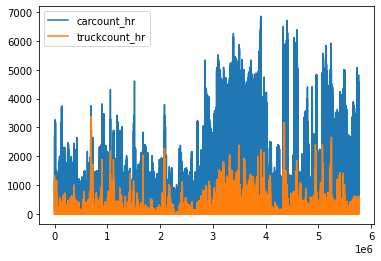

In [259]:
berlinLoopY19[['carcount_hr', 'truckcount_hr']].plot()

# Berlin Loop data for Year 2020
source:https://tomtominternational.sharepoint.com/sites/TrafficExpertsTeamsEECAWCE/Shared%20Documents/Forms/AllItems.aspx?id=%2Fsites%2FTrafficExpertsTeamsEECAWCE%2FShared%20Documents%2FLoop%20Data%20RSO%2FLoop%20Data%20Berlin%2Ezip&parent=%2Fsites%2FTrafficExpertsTeamsEECAWCE%2FShared%20Documents%2FLoop%20Data%20RSO

In [260]:
pathToData = "/Users/gholvea/Source/Berlin/Loop Data Berlin/det_val_hr_2020.csv.gz"
berlinLD20 = pd.read_csv(pathToData, sep =";")
pd.set_option('colheader_justify', 'center')
#berlinLD20

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [261]:
berlinLoopY20 = berlinLD20.rename(columns={ 'q_pkw_det_hr':'carcount_hr', 'q_lkw_det_hr':'truckcount_hr', 'q_kfz_det_hr': 'toatlcountvehicle_hr', 'v_pkw_det_hr':'speedbycar', 'v_lkw_det_hr':'speedbytruck','v_kfz_det_hr':'avgspeedbyvehicle' })

df =berlinLoopY20.dropna(subset=['carcount_hr', 'truckcount_hr','toatlcountvehicle_hr'])
df = df.dropna()
df20 = df.reset_index(drop=True)

In [262]:
berlinDet = berLoopNew.merge(df20, how='inner', left_on='DET_ID15', right_on='detid_15')
berDetector = berlinDet.drop(columns= ['detid_15'])
berlinLoop20 = berDetector[[ 'ZE_ID15','MQ_ID15','DET_ID15','tag', 'stunde', 'LANE', 'MQ_SHORT_NAME','ORIENTATION', 'ANZAHL_DET', 'latitude', 'longitude', 'carcount_hr', 'truckcount_hr','toatlcountvehicle_hr', 'speedbycar', 'speedbytruck', 'avgspeedbyvehicle']]
berlinLoop20.sort_values(by=['tag'])

,ZE_ID15,MQ_ID15,DET_ID15,tag,stunde,LANE,MQ_SHORT_NAME,ORIENTATION,ANZAHL_DET,latitude,longitude,carcount_hr,truckcount_hr,toatlcountvehicle_hr,speedbycar,speedbytruck,avgspeedbyvehicle
0,100401010000103,100201010000077,100101010000167,01.01.2020,23.0,HF_R,TE001,Südwest,2,52.433874,13.192581,169.0,18.0,187.0,73.8,73.7,73.8
5320236,100401020001712,100201020001787,100101020003695,01.01.2020,8.0,NaN,MQ319,Nord,2,52.534862,13.292676,95.0,8.0,103.0,73.7,76.7,72.9
5320235,100401020001712,100201020001787,100101020003695,01.01.2020,1.0,NaN,MQ319,Nord,2,52.534862,13.292676,457.0,14.0,472.0,71.4,74.3,70.3
5320234,100401020001712,100201020001787,100101020003695,01.01.2020,21.0,NaN,MQ319,Nord,2,52.534862,13.292676,323.0,22.0,346.0,72.4,71.1,71.3
7268541,100401020035256,100201020035335,100101020080386,01.01.2020,13.0,HF_3vR,MQ901,West,1,52.509094,13.267860,6.0,0.0,6.0,29.2,-1.0,30.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3351932,100401010024149,100201010028369,100101010062411,31.12.2020,19.0,AbL_R,TE351,Nordost,2,52.519607,13.413213,200.0,1.0,201.0,51.2,0.0,50.9
360511,100401010001921,100201010002303,100101010004413,31.12.2020,10.0,HF_2vR,TE023,Nord,3,52.574619,13.429524,588.0,13.0,601.0,45.9,42.4,45.8
3068303,100401010022230,100201010026147,100101010057256,31.12.2020,3.0,HF_R,TE329,Nord,2,52.466940,13.431744,16.0,4.0,20.0,42.1,7.8,35.2
3068307,100401010022230,100201010026147,100101010057256,31.12.2020,7.0,HF_R,TE329,Nord,2,52.466940,13.431744,52.0,4.0,56.0,41.7,10.3,39.5


In [263]:
berlinLoop20['datetime']= pd.to_datetime(berlinLoop20['tag'] +' ' + berlinLoop20['stunde'].astype(int).astype(str),
                                         format = '%d.%m.%Y %H')
berlinLoop20.drop(columns= ['tag','stunde','MQ_SHORT_NAME','ANZAHL_DET'], inplace = True)


<ipython-input-263-1846bd84497a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  berlinLoop20['datetime']= pd.to_datetime(berlinLoop20['tag'] +' ' + berlinLoop20['stunde'].astype(int).astype(str),
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [264]:
berDetY20 =berlinLoop20[[ 'ZE_ID15','MQ_ID15','DET_ID15', 'LANE', 'datetime', 'latitude', 'longitude', 'carcount_hr', 'truckcount_hr','toatlcountvehicle_hr']]
#berDetY20
berlinLoopY20 = berDetY20.groupby(['ZE_ID15', 'MQ_ID15','latitude','longitude','datetime']).sum().reset_index()
berlinLoopY20.sort_values(by = ['datetime'])

,ZE_ID15,MQ_ID15,latitude,longitude,datetime,carcount_hr,truckcount_hr,toatlcountvehicle_hr
0,100401010000103,100201010000077,52.433874,13.192581,2020-01-01 00:00:00,128.0,40.0,168.0
3441636,100401020015553,100201020015531,52.461129,13.411997,2020-01-01 00:00:00,495.0,30.0,524.0
3422787,100401020015250,100201020015228,52.461653,13.426877,2020-01-01 00:00:00,529.0,13.0,543.0
3416526,100401020015149,100201020015127,52.462056,13.430667,2020-01-01 00:00:00,87.0,1.0,88.0
3410225,100401020015048,100201020015026,52.461968,13.430627,2020-01-01 00:00:00,450.0,18.0,468.0
...,...,...,...,...,...,...,...,...
750660,100401010010611,100201010013518,52.538263,13.426623,2020-12-31 23:00:00,141.0,0.0,141.0
681127,100401010009500,100201010012003,52.508140,13.351845,2020-12-31 23:00:00,192.0,72.0,264.0
1848602,100401010038903,100201010038776,52.528531,13.454954,2020-12-31 23:00:00,210.0,2.0,212.0
1831322,100401010038701,100201010038574,52.501913,13.331248,2020-12-31 23:00:00,128.0,1.0,129.0


<AxesSubplot:>

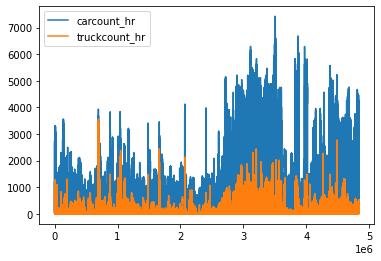

In [265]:
berlinLoopY20[['carcount_hr', 'truckcount_hr']].plot()

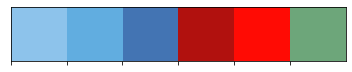

In [242]:
color_palette =[ "#8DC3EB","#61ADE0","#4374B3","#B1110E","#FF0B04","#6DA67A"]
sns.palplot(color_palette)

# Plots
Comparision between 2019 and 2020 for Berlin

<AxesSubplot:xlabel='datetime', ylabel='carcount_hr'>

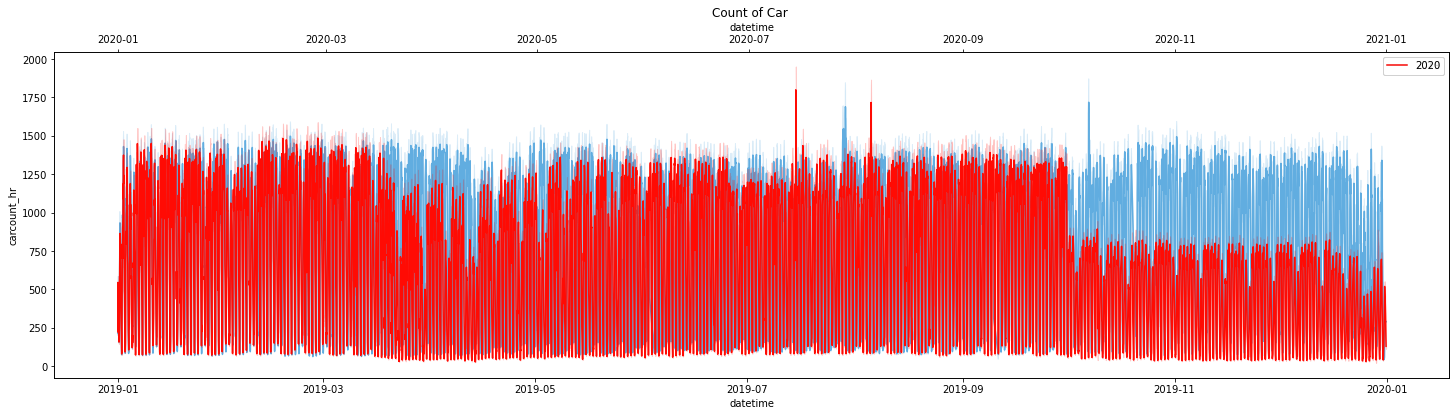

In [246]:
plt.figure(figsize=(25, 6))
plt.title("Count of Car ")
ax1 = sns.lineplot(data=berlinLoopY19, x="datetime", y="carcount_hr", color=color_palette[1], label="2019")
ax2 = ax1.twiny()
sns.lineplot(ax=ax2, data=berlinLoopY20, x="datetime", y="carcount_hr", color=color_palette[4], label="2020")

<AxesSubplot:xlabel='datetime', ylabel='truckcount_hr'>

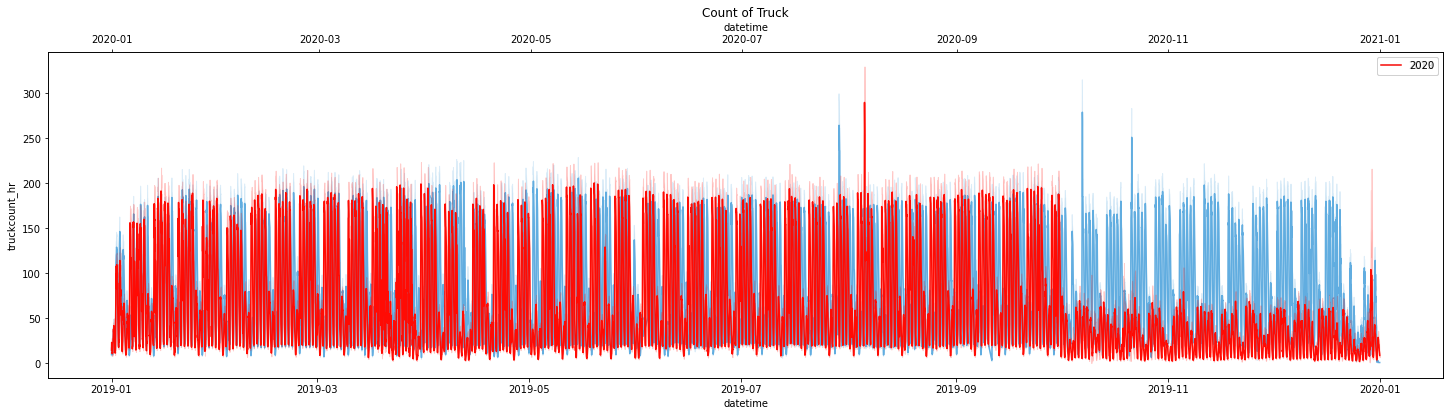

In [247]:
plt.figure(figsize=(25, 6))
plt.title("Count of Truck")
ax1 = sns.lineplot(data=berlinLoopY19, x="datetime", y="truckcount_hr", color=color_palette[1], label="2019")
ax2 = ax1.twiny()
sns.lineplot(ax=ax2, data=berlinLoopY20, x="datetime", y="truckcount_hr", color=color_palette[4], label="2020")